In [1]:
import numpy as np
import scipy as sp
import librosa
import librosa.display
import matplotlib.pyplot as plt

from modules.autocorrelation import autocorrelation, get_ac_peaks
from modules.cepstrum import get_cepstrum, get_ceps_peaks, get_envelope
from modules.spectrogram import spectrogram
from modules.lpc import levinson_durbin_method

In [2]:
wave_data, sr = librosa.load('audio/aiueo.wav')

In [18]:
# clip_size = 8192
clip_size = len(wave_data)

In [19]:
fscale = np.fft.fftfreq(clip_size, d=1.0 / sr)
fscale.shape

(109024,)

In [20]:
freq = np.fft.rfft(wave_data, clip_size)
amp = 20 * np.log10(np.abs(freq))
amp.shape

(54513,)

In [21]:
ceps_db = get_cepstrum(wave_data, is_clipping=True, is_framing=False, clip_size=clip_size)
ceps_env = get_envelope(ceps_db, 100)
ceps_env.shape

(54513,)

In [22]:
a, e = levinson_durbin_method(wave_data, 100)
_, h = sp.signal.freqz(np.sqrt(e), a, clip_size, "whole")
lpc_env = 20 * np.log10(np.abs(h))
lpc_env.shape

(109024,)

In [23]:
lpc_env

array([26.4665382 , 26.46656414, 26.46664194, ..., 26.46677161,
       26.46664194, 26.46656414])

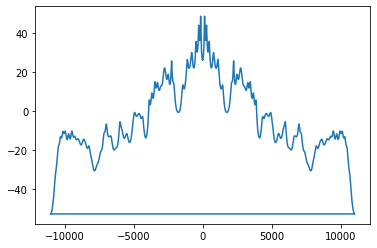

In [24]:
plt.plot(fscale, lpc_env)

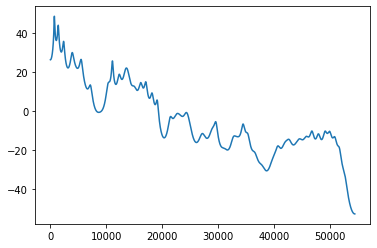

In [25]:
plt.plot(lpc_env[:clip_size//2])

/Users/daishin/Documents/rinko/rinko_env/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


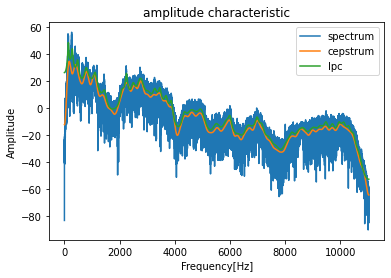

In [28]:
plt.plot(fscale[:clip_size//2], amp[:clip_size//2], label='spectrum')
plt.plot(fscale[:clip_size//2], ceps_env[:clip_size//2], label='cepstrum')
plt.plot(fscale[:clip_size//2], lpc_env[:clip_size//2], label='lpc')
plt.title("amplitude characteristic")
plt.xlabel("Frequency[Hz]")
plt.ylabel("Amplitude")
plt.legend()